# Introduction to Pandas

Pandas is a library for managing large datasets in tabular format. It is powerful with lots of functionality and is very fast.

We cover loading data and then Pandas data cleaning and organisation commands

Pandas gets very powerful when the volume of data is too big for Excel

In [1]:
# We load Pandas and prefix all of its commands with pd
import pandas as pd
import matplotlib.pyplot as plt

## The Series

In [2]:
sales = pd.Series(data=[303,391,374, 401], index=['Q1','Q2','Q3', 'Q4'])

In [3]:
sales

Q1    303
Q2    391
Q3    374
Q4    401
dtype: int64

In [4]:
sales['Q1']

303

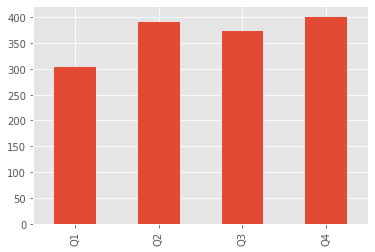

In [5]:
plt.style.use('ggplot') 
sales.plot.bar();

## The DataFrame

In [6]:
df = pd.DataFrame([1,3,5,7], columns = ['odd'], index = ['a','b','c','d'])
df

,odd
a,1
b,3
c,5
d,7


In [7]:
df['even'] = [2,4,6,8]

In [8]:
df

,odd,even
a,1,2
b,3,4
c,5,6
d,7,8


In [9]:
type(df['odd'])

pandas.core.series.Series

In [10]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [11]:
df.columns

Index(['odd', 'even'], dtype='object')

In [12]:
df.head(5)

,odd,even
a,1,2
b,3,4
c,5,6
d,7,8


In [13]:
df.loc['a']

odd     1
even    2
Name: a, dtype: int64

In [14]:
df.iloc[2]

odd     5
even    6
Name: c, dtype: int64

In [15]:
df['square'] = [1,2,4,16]

In [16]:
df

,odd,even,square
a,1,2,1
b,3,4,2
c,5,6,4
d,7,8,16


In [17]:
# We can use column name to access it as follows
df.odd

a    1
b    3
c    5
d    7
Name: odd, dtype: int64

In [18]:
# We can use column name to access it as follows
df.square

a     1
b     2
c     4
d    16
Name: square, dtype: int64

In [19]:
df.shape

(4, 3)

## Loading a Large Dataset

Let's consider a larger data set

In [23]:
# We read the file into the data frame in one go
# Pandas always assumes that the first row is the header
df = pd.read_csv("./optionPortfolio.csv") 

In [24]:
df.columns

Index(['TradeDate', 'Currency', 'Ticker', 'OptionType', 'TradedStockPrice',
       'NumOptions', 'Strike', 'ExpiryDate'],
      dtype='object')

In [25]:
df.head()

,TradeDate,Currency,Ticker,OptionType,TradedStockPrice,NumOptions,Strike,ExpiryDate
0,2013-01-02,USD,PUT,BA,77.070000,60,77,2013-07-01
1,2013-01-02,USD,PUT,XRX,18.945982,330,19,2013-07-01
2,2013-01-02,USD,CALL,CHK,15.704825,230,15,2013-04-02
3,2013-01-02,USD,PUT,FB,28.000000,340,28,2013-12-28
4,2013-01-02,USD,PUT,MSFT,27.620001,690,26,2013-12-28


In [26]:
# There is a mislabelled column - let's fix it
df.columns = ['TradeDate', 'Currency', 'OptionType', 'Ticker', 'TradedStockPrice',
       'NumOptions', 'Strike', 'ExpiryDate']

In [27]:
# What is this ?
type(df)

pandas.core.frame.DataFrame

In [28]:
# We can see the size of the data frame
df.shape

(4198, 8)

In [30]:
# head gives us the first 5 rows 
df.head()

,TradeDate,Currency,OptionType,Ticker,TradedStockPrice,NumOptions,Strike,ExpiryDate
0,2013-01-02,USD,PUT,BA,77.070000,60,77,2013-07-01
1,2013-01-02,USD,PUT,XRX,18.945982,330,19,2013-07-01
2,2013-01-02,USD,CALL,CHK,15.704825,230,15,2013-04-02
3,2013-01-02,USD,PUT,FB,28.000000,340,28,2013-12-28
4,2013-01-02,USD,PUT,MSFT,27.620001,690,26,2013-12-28


## Preparing the Data

In [31]:
# Look for missing data by getting info on all of the columns
# Make sure all the fields have the correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 8 columns):
TradeDate           4198 non-null object
Currency            4198 non-null object
OptionType          4198 non-null object
Ticker              4198 non-null object
TradedStockPrice    4198 non-null float64
NumOptions          4198 non-null int64
Strike              4198 non-null int64
ExpiryDate          4198 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 262.5+ KB


In [32]:
df = df.drop(['Currency'],axis=1)

In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
df['OptionType'].unique()

array(['PUT', 'CALL'], dtype=object)

In [35]:
df['Ticker'].value_counts()

XRX     589
MSFT    586
CHK     584
BA      554
FB      548
AMZN    544
AAPL    528
BLCM    265
Name: Ticker, dtype: int64

## Examining the Dataframe

In [36]:
# We can convert the data frame to a Numpy array 
m = df.values

In [37]:
type(m)

numpy.ndarray

In [38]:
m[10,4]

640

In [39]:
# To get the first 8 rows we can use iloc
df.iloc[1:9]

,TradeDate,OptionType,Ticker,TradedStockPrice,NumOptions,Strike,ExpiryDate
1,2013-01-02,PUT,XRX,18.945982,330,19,2013-07-01
2,2013-01-02,CALL,CHK,15.704825,230,15,2013-04-02
3,2013-01-02,PUT,FB,28.000000,340,28,2013-12-28
4,2013-01-02,PUT,MSFT,27.620001,690,26,2013-12-28
5,2013-01-02,PUT,FB,28.000000,240,26,2013-07-01
6,2013-01-02,CALL,FB,28.000000,590,28,2013-12-28
7,2013-01-03,CALL,XRX,18.945982,0,19,2013-04-03
8,2013-01-03,CALL,AMZN,258.480011,450,249,2013-07-02


## Apply

The trade date is in a string form

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 7 columns):
TradeDate           4198 non-null object
OptionType          4198 non-null object
Ticker              4198 non-null object
TradedStockPrice    4198 non-null float64
NumOptions          4198 non-null int64
Strike              4198 non-null int64
ExpiryDate          4198 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 229.7+ KB


In [41]:
# We write a quick function to remove the '/' from the date and to replace it with a space
# We could have done this another way but I 
def dateConverter(dt):
    dt = dt.replace('-',' ')
    return pd.to_datetime(dt, format='%Y %m %d',dayfirst=True)

In [42]:
# The apply function let's us do something complicated to a column 
df['TradeDate'] = df['TradeDate'].apply(dateConverter) 

In [43]:
df['ExpiryDate'] = df['ExpiryDate'].apply(dateConverter) 

In [44]:
df

,TradeDate,OptionType,Ticker,TradedStockPrice,NumOptions,Strike,ExpiryDate
0,2013-01-02,PUT,BA,77.070000,60,77,2013-07-01
1,2013-01-02,PUT,XRX,18.945982,330,19,2013-07-01
2,2013-01-02,CALL,CHK,15.704825,230,15,2013-04-02
3,2013-01-02,PUT,FB,28.000000,340,28,2013-12-28
4,2013-01-02,PUT,MSFT,27.620001,690,26,2013-12-28
...,...,...,...,...,...,...,...
4193,2016-12-30,CALL,CHK,7.020000,90,7,2017-06-28
4194,2016-12-30,PUT,BLCM,13.620000,700,14,2017-06-28
4195,2016-12-30,PUT,AMZN,749.869995,750,782,2017-12-25
4196,2016-12-30,PUT,XRX,23.003952,30,22,2017-12-25


In [45]:
# The date is now a datetime 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 7 columns):
TradeDate           4198 non-null datetime64[ns]
OptionType          4198 non-null object
Ticker              4198 non-null object
TradedStockPrice    4198 non-null float64
NumOptions          4198 non-null int64
Strike              4198 non-null int64
ExpiryDate          4198 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 229.7+ KB


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 7 columns):
TradeDate           4198 non-null datetime64[ns]
OptionType          4198 non-null object
Ticker              4198 non-null object
TradedStockPrice    4198 non-null float64
NumOptions          4198 non-null int64
Strike              4198 non-null int64
ExpiryDate          4198 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 229.7+ KB


## Filters

In [47]:
df['OptionType'] == "PUT"

0        True
1        True
2       False
3        True
4        True
        ...  
4193    False
4194     True
4195     True
4196     True
4197     True
Name: OptionType, Length: 4198, dtype: bool

In [48]:
df[df['OptionType'] == "PUT"].head()

,TradeDate,OptionType,Ticker,TradedStockPrice,NumOptions,Strike,ExpiryDate
0,2013-01-02,PUT,BA,77.070000,60,77,2013-07-01
1,2013-01-02,PUT,XRX,18.945982,330,19,2013-07-01
3,2013-01-02,PUT,FB,28.000000,340,28,2013-12-28
4,2013-01-02,PUT,MSFT,27.620001,690,26,2013-12-28
5,2013-01-02,PUT,FB,28.000000,240,26,2013-07-01


In [49]:
df[(df['Ticker'] == "AAPL") & (df['OptionType'] == "PUT")].head()

,TradeDate,OptionType,Ticker,TradedStockPrice,NumOptions,Strike,ExpiryDate
18,2013-01-08,PUT,AAPL,75.044289,650,75,2013-04-08
29,2013-01-14,PUT,AAPL,71.678574,940,73,2014-01-09
34,2013-01-16,PUT,AAPL,72.298569,250,72,2014-01-11
44,2013-01-22,PUT,AAPL,72.110001,530,74,2013-04-22
47,2013-01-22,PUT,AAPL,72.110001,490,70,2013-07-21


In [50]:
import datetime as dt
df[(df['ExpiryDate'] < dt.datetime(2013,10,2)) & (df['OptionType'] == "PUT")]

,TradeDate,OptionType,Ticker,TradedStockPrice,NumOptions,Strike,ExpiryDate
0,2013-01-02,PUT,BA,77.070000,60,77,2013-07-01
1,2013-01-02,PUT,XRX,18.945982,330,19,2013-07-01
5,2013-01-02,PUT,FB,28.000000,240,26,2013-07-01
11,2013-01-07,PUT,CHK,16.669821,820,17,2013-04-07
17,2013-01-08,PUT,FB,29.059999,480,29,2013-07-07
...,...,...,...,...,...,...,...
461,2013-06-18,PUT,AAPL,61.681427,240,64,2013-09-16
469,2013-06-20,PUT,CHK,18.997162,740,19,2013-09-18
470,2013-06-21,PUT,FB,24.530001,430,24,2013-09-19
486,2013-06-26,PUT,FB,24.160000,400,23,2013-09-24


## Group By

This enables us to do a breakdown by a particular field

In [ ]:
df[['NumOptions','Ticker']].groupby(['Ticker']).count()

In [ ]:
df[['Strike','Ticker']].groupby(['Ticker']).mean()